## Observations from NPN  

**Species:** Syringa vulgaris
<br>
**Phenophase (fb):** 483 (?) 

In [1]:
import springtime
from springtime.datasets.NPNPhenor import NPNPhenor, npn_species, npn_phenophases

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import folium

### Data from all the locations

In [3]:
# # List IDs and names for available species, phenophases
# species = npn_species()
# phenophases = npn_phenophases()

In [4]:
# Load dataset
# years is needed! [start,end+1]!
# If there is no data for one year we get error---check years=[2013, 2014]
dataset = NPNPhenor(species=36, phenophase=483, years=[2012, 2013])
dataset

NPNPhenor(dataset='NPNPhenor', species=36, phenophase=483, years=(2012, 2013), area=None)

In [5]:
dataset.download()
df = dataset.load()
df.head()

/tmp/data/NPN/phenor_npn_data_36_483_2012-01-01_2012-12-31.rds already exists, skipping


,site_id,elevation_in_meters,state,species_id,genus,species,common_name,kingdom,individual_id,phenophase_id,...,first_yes_doy,first_yes_julian_date,numdays_since_prior_no,last_yes_year,last_yes_month,last_yes_day,last_yes_doy,last_yes_julian_date,numdays_until_next_no,geometry
1,17919,3,NC,36,Syringa,vulgaris,common lilac,Plantae,70343,483,...,77,2456004,-9999,2012,3,17,77,2456004,-9999,POINT (-76.61472 35.19228)
2,17926,592,TN,36,Syringa,vulgaris,common lilac,Plantae,70370,483,...,73,2456000,-9999,2012,3,13,73,2456000,-9999,POINT (-87.22970 35.62196)
3,17931,761,TN,36,Syringa,vulgaris,common lilac,Plantae,70385,483,...,319,2456246,-9999,2012,11,14,319,2456246,-9999,POINT (-86.86285 35.80284)
4,17934,824,NC,36,Syringa,vulgaris,common lilac,Plantae,70398,483,...,84,2456011,-9999,2012,3,24,84,2456011,-9999,POINT (-79.69920 35.89343)
5,17937,1113,TN,36,Syringa,vulgaris,common lilac,Plantae,70410,483,...,72,2455999,-9999,2012,3,12,72,2455999,-9999,POINT (-83.49780 35.98126)


In [6]:
print("We have",df.shape[0], "observations")
print("The observations are from",df['last_yes_year'].min(),"to",df['last_yes_year'].max())

We have 115 observations
The observations are from 2012 to 2012


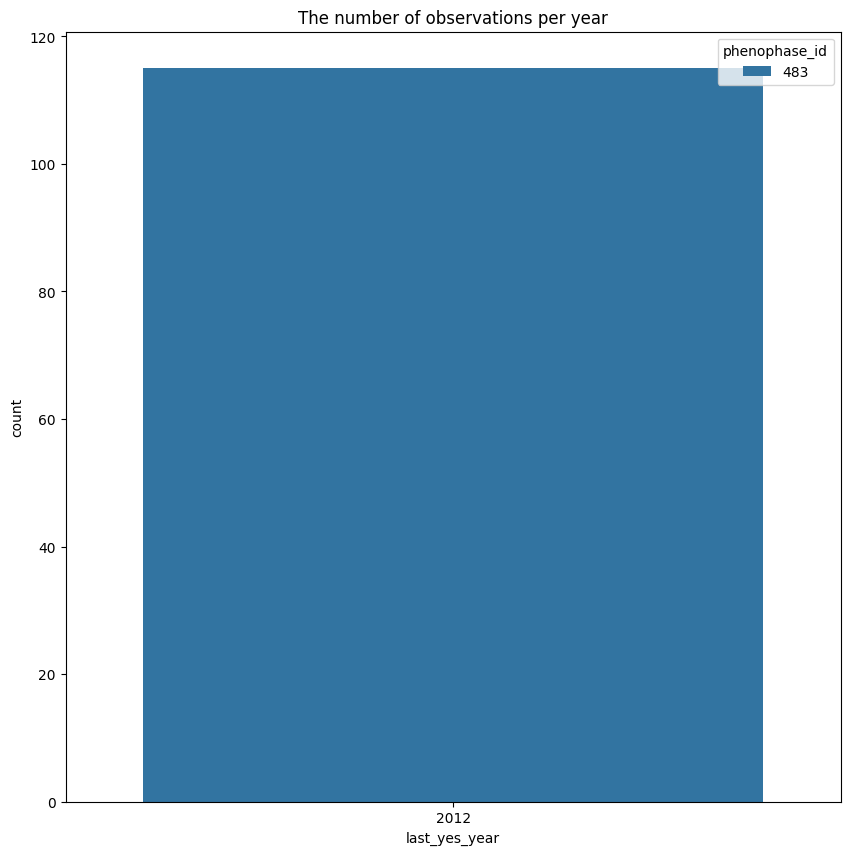

In [7]:
fig, ax= plt.subplots(1,1)  
fig.set_size_inches(10, 10)
plot_ = sns.countplot(x = 'last_yes_year', hue ='phenophase_id', data= df)
# for ind, label in enumerate(plot_.get_xticklabels()):
#     if ind % 5 == 0:  # every 5th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
# plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The number of observations per year")
plt.show()

#### Spatial Analysis

<Axes: >

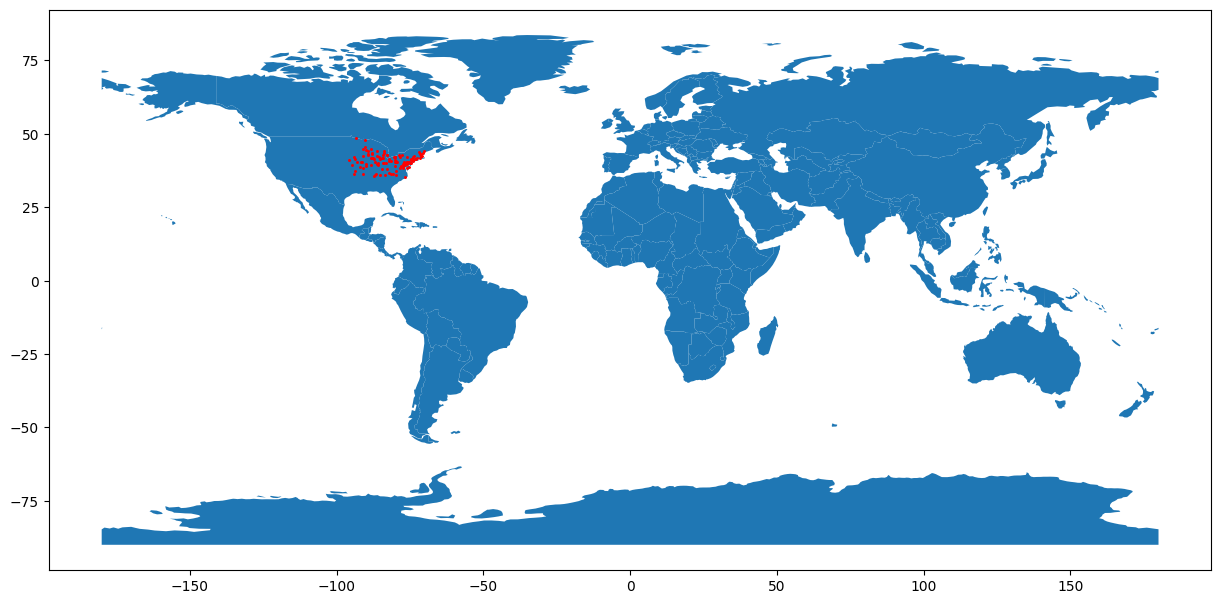

In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
df.plot(ax=world.plot(figsize=(15, 15)), marker='.', color='red', markersize=5)

#### Temporal Analysis

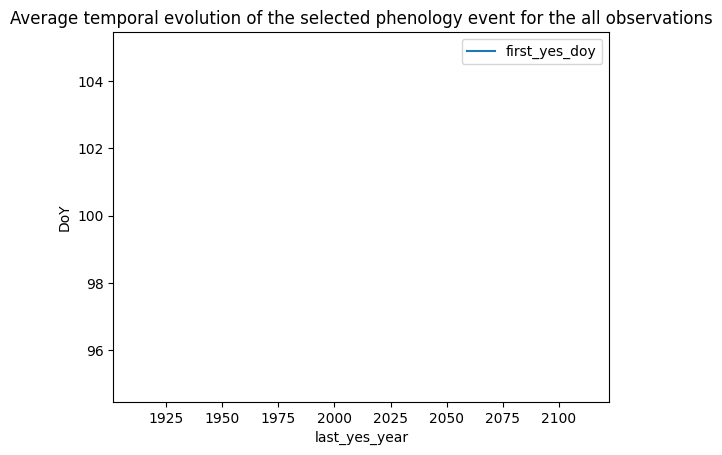

In [9]:
ts1 = df.groupby('last_yes_year', as_index=False)['first_yes_doy'].mean()
ts1.plot(x="last_yes_year",y="first_yes_doy")
plt.title('Average temporal evolution of the selected phenology event for the all observations')
plt.ylabel('DoY')

plt.show()

In [10]:
ts1

,last_yes_year,first_yes_doy
0,2012,99.965217


### Data from a boundingbox

In [11]:
def get_bounding_box(latitude_in_degrees, longitude_in_degrees, half_side_in_km):
    assert half_side_in_km > 0
    assert latitude_in_degrees >= -90.0 and latitude_in_degrees  <= 90.0
    assert longitude_in_degrees >= -180.0 and longitude_in_degrees <= 180.0

    lat = math.radians(latitude_in_degrees)
    lon = math.radians(longitude_in_degrees)

    radius  = 6371
    # Radius of the parallel at given latitude
    parallel_radius = radius*math.cos(lat)

    lat_min = lat - half_side_in_km/radius
    lat_max = lat + half_side_in_km/radius
    lon_min = lon - half_side_in_km/parallel_radius
    lon_max = lon + half_side_in_km/parallel_radius
    rad2deg = math.degrees

    box = (rad2deg(lon_min),rad2deg(lat_min),rad2deg(lon_max),rad2deg(lat_max))

    return (box)

In [12]:
#The latitude of Washington, the USA is 47.751076, and the longitude is -120.740135
# The latitude of New York City, NY, USA is 40.730610, and the longitude is -73.935242.
# The latitude of Tennessee, USA is 35.860119, and the longitude is -86.660156. Tennessee,
target_lat = 47.751076
target_lon = -120.740135

# boundingbox around Washington
half_side_in_km = 50
bbox = get_bounding_box(target_lat,target_lon,half_side_in_km)
bbox

(-121.40892188082722,
 47.30141519704063,
 -120.07134811917277,
 48.20073680295936)

In [13]:
dataset = NPNPhenor(species=3, phenophase=371, years=[2010, 2011], area={'name':'some', 'bbox':bbox})
dataset

NPNPhenor(dataset='NPNPhenor', species=3, phenophase=371, years=(2010, 2011), area=NamedArea(name='some', bbox=(-121.40892188082722, 47.30141519704063, -120.07134811917277, 48.20073680295936)))

In [14]:
dataset.download()
df_wa= dataset.load()
df_wa.head()

downloading /tmp/data/NPN/phenor_npn_data_3_371_2010-01-01_2010-12-31.rds
Downloading: 13 kB     13 kB     24 kB     24 kB     41 kB     41 kB     58 kB     58 kB     73 kB     73 kB     73 kB     73 kB     

R[write to console]: No encoding supplied: defaulting to UTF-8.



,site_id,elevation_in_meters,state,species_id,genus,species,common_name,kingdom,individual_id,phenophase_id,...,first_yes_doy,first_yes_julian_date,numdays_since_prior_no,last_yes_year,last_yes_month,last_yes_day,last_yes_doy,last_yes_julian_date,numdays_until_next_no,geometry
1,2,12,ME,3,Acer,rubrum,red maple,Plantae,9,371,...,96,2455293,4,2010,4,30,120,2455317,2,POINT (-70.69133 43.08535)
2,459,234,MO,3,Acer,rubrum,red maple,Plantae,638,371,...,94,2455291,11,2010,4,25,115,2455312,174,POINT (-92.75200 36.52450)
3,374,161,IN,3,Acer,rubrum,red maple,Plantae,793,371,...,106,2455303,28,2010,4,16,106,2455303,-9999,POINT (-87.64120 38.05990)
4,950,2,FL,3,Acer,rubrum,red maple,Plantae,926,371,...,45,2455242,14,2010,2,14,45,2455242,28,POINT (-81.75751 30.17840)
5,1068,4,DE,3,Acer,rubrum,red maple,Plantae,1255,371,...,97,2455294,22,2010,4,7,97,2455294,207,POINT (-75.15203 38.77611)


In [15]:
print("We have",df_wa.shape[0], "observations")
print("The observations are from",df_wa['last_yes_year'].min(),"to",df_wa['last_yes_year'].max())
#df_wa.to_csv("Washington_data.csv")  

We have 131 observations
The observations are from 2010 to 2010


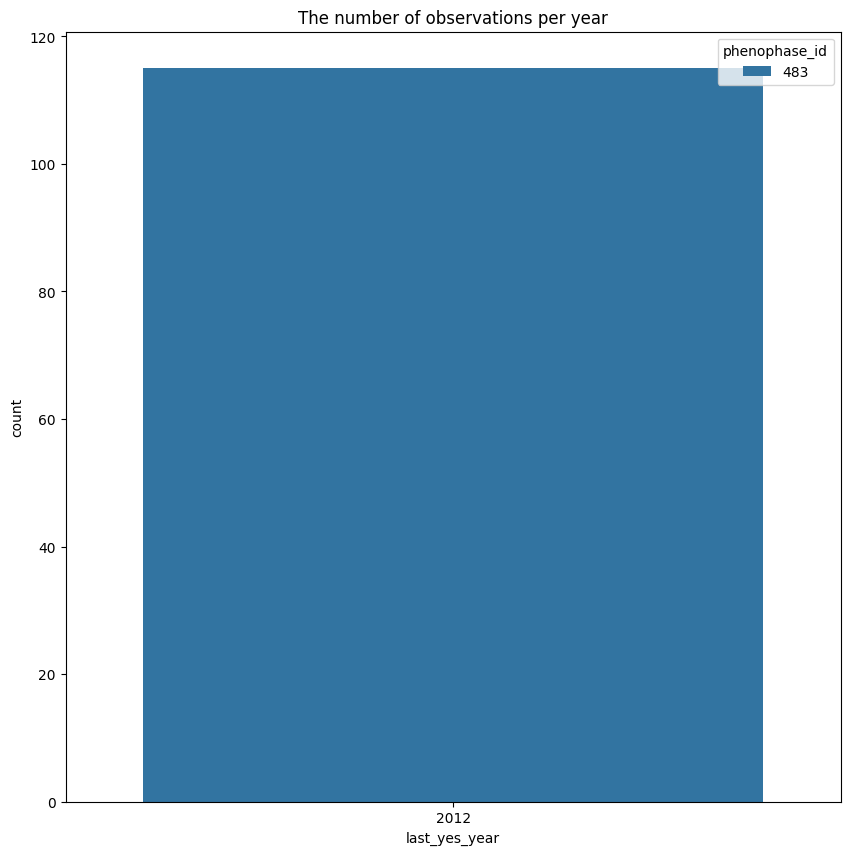

In [16]:
fig, ax= plt.subplots(1,1)  
fig.set_size_inches(10, 10)
plot_ = sns.countplot(x = 'last_yes_year', hue ='phenophase_id', data= df)
# for ind, label in enumerate(plot_.get_xticklabels()):
#     if ind % 5 == 0:  # every 5th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)
# plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.title("The number of observations per year")
plt.show()

#### Spatial Analysis

In [17]:
#create a map
this_map = folium.Map(prefer_canvas=True)

def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.CircleMarker(location=[point.geometry.y, point.geometry.x],
                        radius=2,
                        weight=5).add_to(this_map)

#use df.apply(,axis=1) to "iterate" through every row in your dataframe
df_wa.apply(plotDot, axis = 1)


#Set the zoom to the maximum possible
this_map.fit_bounds(this_map.get_bounds())

#this_map.save('html_map_output/simple_dot_plot.html')
this_map

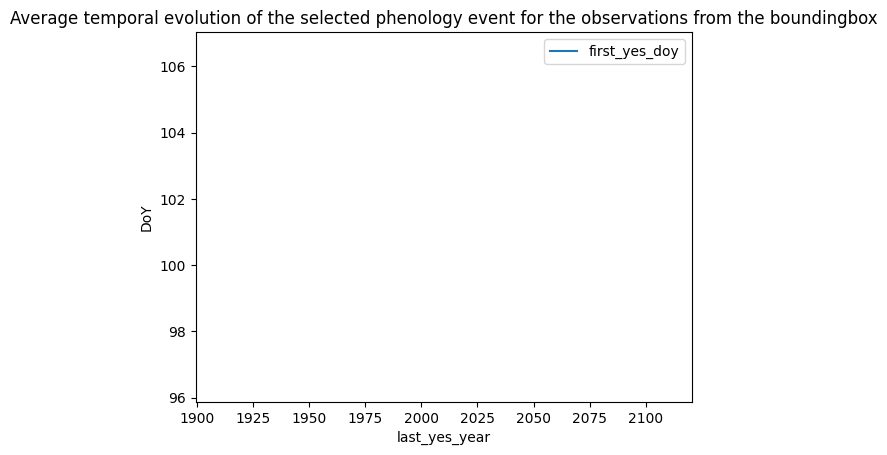

In [18]:
ts2 = df_wa.groupby('last_yes_year', as_index=False)['first_yes_doy'].mean()
ts2.plot(x="last_yes_year",y="first_yes_doy")
plt.title('Average temporal evolution of the selected phenology event for the observations from the boundingbox')
plt.ylabel('DoY')

plt.show()


In [19]:
ts2

,last_yes_year,first_yes_doy
0,2010,101.458015
